In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
recipes = pd.read_csv('asian_indian_recipes.csv')
recipes.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
data = recipes.iloc[:,1:]
data.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
data.tail()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
2443,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 384 entries, cuisine to zucchini
dtypes: int64(383), object(1)
memory usage: 7.2+ MB


In [6]:
data.isnull().sum().sum()

0

Đầu tiên, em thấy dữ liệu là tất cả các cột đều là category, và không có một ô dữ liệu nào missing value hết. Nên em tiến hành các bước xem số lượng mỗi loại cho target variable.

In [7]:
df = data.groupby('cuisine').count()
number = df.iloc[:,0:1]
number

,almond
cuisine,
chinese,442
indian,598
japanese,320
korean,799
thai,289


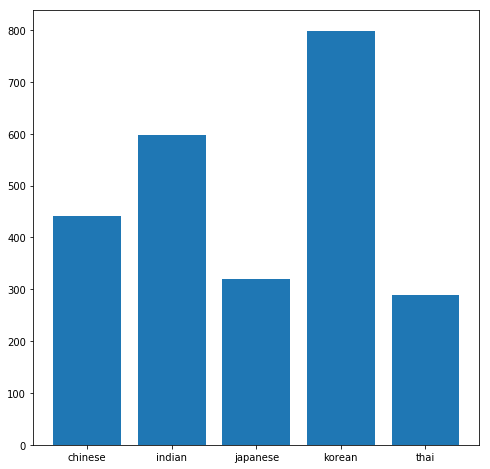

In [8]:
plt.figure(figsize = (8,8))
plt.bar(number.index,number.almond)
plt.show()

Ta thấy số lượng mẫu khá cân bằng ở các loại, mặc dù vẫn còn chêch lệch giữa 799 và 289, nhưng vẫn chấp nhận được.

** Cắt dữ liệu ra tập train và test: Em cắt dữ liệu 7:3 và áp dụng random forest trước, xem xét rồi sau đó mới áp dụng chỉnh tham số, kfold, grid search, random search. 

In [10]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:]
Y = data['cuisine']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [11]:
X_train.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
1453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2263,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200)
model = model.fit(X_train, Y_train)

In [13]:
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8054421768707483

In [14]:
model.score(X_test, Y_test)

0.8054421768707483

In [15]:
model.score(X_train, Y_train)

0.997081144191477

Bước đầu ta thấy Random forest hoạt động khá ổn cho bộ dữ liệu trên, độ chính xác là 80.5%, nhưng ta thấy vẫn có chêch lệch score giữa tập train và tập test. Ta phải đi tối ưu hơn mô hình

** Bước này em chia train test ra 8:2

In [16]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [17]:
model_1 = RandomForestClassifier(n_estimators=200)
model_1 = model.fit(X_train_1, Y_train_1)

In [18]:
Y_pred_1 = model_1.predict(X_test_1)
accuracy_score(Y_test_1, Y_pred_1)

0.810204081632653

Mô hình tăng độ chính xác là 81.0%.

** Bước này em chọn lọc features quan trọng xem có cải thiện độ chính xác hay không

In [19]:
imp_features = pd.Series(model_1.feature_importances_, index = X.columns).sort_values(ascending = False)

X_new = X

list_of_ind = imp_features.index
list_drop = []

for i in range(imp_features.shape[0]):
    if imp_features[i] < 0.005:
        list_drop.append(list_of_ind[i])

In [20]:
X_new = X_new.drop(list_drop, axis = 1)

In [21]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_new, Y, test_size = 0.2, random_state = 42)

In [22]:
model_2 = RandomForestClassifier(n_estimators=200)
model_2 = model.fit(X_train_2, Y_train_2)

In [23]:
Y_pred_2 = model_2.predict(X_test_2)
accuracy_score(Y_test_2, Y_pred_2)

0.7918367346938775

In [24]:
model_2.score(X_train_2, Y_train_2)

0.9882533197139939

In [25]:
model_2.score(X_test_2, Y_test_2)

0.7918367346938775

Mặc dầu đã lọc features nhưng bài toán không cải thiện độ chính xác, nên em sẽ giữ nguyên tất cả features

**Chọn thuật toán tốt nhất cho bộ dữ liệu trên:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [27]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [28]:
models = [
    LogisticRegression(solver = 'sag'),
    DecisionTreeClassifier(criterion = 'gini'),
    RandomForestClassifier(n_estimators=200),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel = 'linear'),
    BernoulliNB(),
    MultinomialNB()
]

CV = 8
cv_df = pd.DataFrame(index = range(CV * len(models)))

each_model = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, Y, scoring = 'accuracy', cv = CV)
    print(accuracies)
    
    each_model.append([model_name, accuracies.mean()])

[0.83116883 0.81758958 0.83660131 0.79738562 0.81699346 0.74509804
 0.81967213 0.77631579]
[0.69805195 0.70358306 0.66993464 0.70261438 0.66993464 0.64052288
 0.69180328 0.67105263]
[0.84415584 0.82084691 0.80392157 0.79411765 0.79738562 0.71895425
 0.80983607 0.76973684]
[0.74350649 0.74267101 0.7254902  0.72875817 0.69934641 0.69281046
 0.72131148 0.68421053]
[0.80194805 0.80781759 0.80392157 0.79738562 0.78104575 0.74509804
 0.79016393 0.75986842]
[0.86038961 0.78827362 0.81699346 0.80392157 0.76143791 0.72875817
 0.82622951 0.75      ]
[0.84415584 0.80781759 0.83333333 0.80392157 0.7254902  0.73202614
 0.81639344 0.74671053]


In [29]:
cv_df = pd.DataFrame(each_model, columns = ['model name', 'mean of accuracy'])
cv_df

,model name,mean of accuracy
0,LogisticRegression,0.805103
1,DecisionTreeClassifier,0.680937
2,RandomForestClassifier,0.794869
3,KNeighborsClassifier,0.717263
4,SVC,0.785906
5,BernoulliNB,0.792000
6,MultinomialNB,0.788731


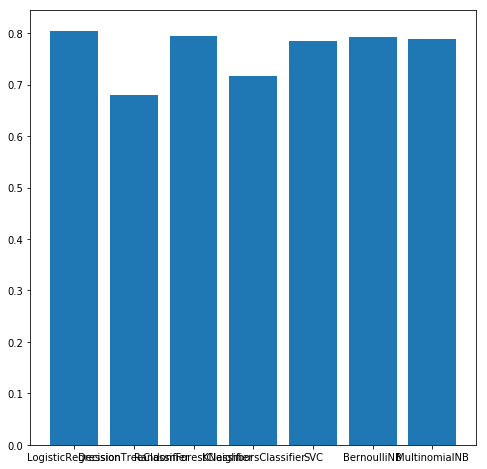

In [30]:
plt.figure(figsize = (8,8))
plt.bar(cv_df['model name'], cv_df['mean of accuracy'])
plt.show()

Sau bước này em thấy được logistic regression for multiclass là phân loại tốt nhất

**Chọn logistic regression để làm grid search

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-5, 5, 20),
    'solver': ['liblinear', 'saga']
}

CV_rfc = GridSearchCV(estimator = LogisticRegression(random_state = 1), param_grid = param_grid, cv = 5)

In [32]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [33]:
CV_rfc.fit(X_train, Y_train)

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\l

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\l

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\khang\appdata\l

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-05, 3.35982e-05, 1.12884e-04, 3.79269e-04, 1.27427e-03,
       4.28133e-03, 1.43845e-02, 4.83293e-02, 1.62378e-01, 5.45559e-01,
       1.83298e+00, 6.15848e+00, 2.06914e+01, 6.95193e+01, 2.33572e+02,
       7.84760e+02, 2.63665e+03, 8.85867e+03, 2.97635e+04, 1.00000e+05]), 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print(CV_rfc.best_params_)

{'C': 1.8329807108324339, 'penalty': 'l1', 'solver': 'liblinear'}


Ta đã chọn được bộ tham số tốt nhất cho logistic regression

In [38]:
model_3 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = CV_rfc.best_params_['C'])
model_3 = model_3.fit(X_train, Y_train)

In [39]:
Y_pred_final = model_3.predict(X_test)

In [40]:
accuracy_score(Y_test, Y_pred_final)

0.8258503401360544

In [41]:
model_3.score(X_train, Y_train)

0.87974314068885

In [42]:
model_3.score(X_test, Y_test)

0.8258503401360544

=> Em thấy được mô hình logistic làm cho độ chính xác tăng lên 2.5% với bộ data 7:3 là 82.6%

** Thử với 8:2

In [43]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [44]:
model_4 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = CV_rfc.best_params_['C'])
model_4 = model_4.fit(X_train_3, Y_train_3)

In [45]:
Y_pred = model_4.predict(X_test_3)

In [46]:
accuracy_score(Y_test_3, Y_pred)

0.8183673469387756

=> Giảm độ chính xác

** Làm việc với KFold

In [47]:
from sklearn.model_selection import KFold
from sklearn import model_selection

model_5 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = CV_rfc.best_params_['C'])
kfold = KFold(n_splits = 10, random_state = 42)
results = model_selection.cross_val_score(model_5, X_train, Y_train, cv = kfold)
print('Accuracy: ', results.mean())

Accuracy:  0.8032639738882089


=> Vậy em thấy được model Logistic Regression với bộ dữ liệu 7:3 sẽ cho độ chính xác cao nhất là 82.6%

** Nhưng để chắc chắn hơn em quay lại phần chọn mô hình, em thấy Random Forest cũng có độ chính xác gần sát với logistic. Nên em sẽ dung grid search với nó để củng cố độ chính xác

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator = RandomForestClassifier(random_state = 1), param_grid = param_grid, cv = 5)

In [49]:
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [51]:
model_6 = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators=200)
model_6 = model_6.fit(X_train, Y_train)

In [52]:
Y_pred = model_6.predict(X_test)

In [53]:
accuracy_score(Y_test, Y_pred)

0.8122448979591836

In [54]:
model_7 = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators=200)
model_7 = model_6.fit(X_train_1, Y_train_1)

In [55]:
Y_pred = model_7.predict(X_test_1)

In [56]:
accuracy_score(Y_test_1, Y_pred)

0.7979591836734694

** Thử Gird Search với BernoulliNB

In [58]:
param_grid = {
    'alpha': range(0,5,1),
    'binarize': range(0,5,1),
    'fit_prior': [True, False]
}

CV_rfc = GridSearchCV(estimator = BernoulliNB(), param_grid = param_grid, cv = 5)

In [59]:
CV_rfc.fit(X_train, Y_train)

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.p

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.p

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': range(0, 5), 'binarize': range(0, 5), 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
CV_rfc.best_params_

{'alpha': 1, 'binarize': 0, 'fit_prior': True}

In [71]:
model_8 = BernoulliNB()
model_8.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [87]:
Y_pred_f = model_8.predict(X_test)

In [94]:
accuracy_score(Y_test, Y_pred_f)

0.8326530612244898

In [89]:
model_8.score(X_train, Y_train)

0.8126094570928196

In [90]:
model_8.score(X_test, Y_test)

0.8326530612244898

In [91]:
model_9 = BernoulliNB()
model_9.fit(X_train_1, Y_train_1)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [92]:
Y_pred = model_8.predict(X_test_1)

In [93]:
accuracy_score(Y_test_1, Y_pred)

0.8285714285714286

=> KẾT LUẬN: Vậy ta thấy được Bernoulli NB (model 8) với bộ dữ liệu 7:3 là tốt nhất với độ chính xác 83.3% 

***** CHỌN BERNOULLI NB ***** Với ACCURACY SCORE LÀ **83.3%**

**Có cumin, fish, nhưng không có fish, yoghurt

In [74]:
X_new = X[(X['cumin'] == 1) & (X['fish'] == 1) & (X['yogurt'] == 0)]

In [75]:
Y_new = model_8.predict(X_new)

In [76]:
Y_new

array(['indian', 'thai', 'thai', 'thai', 'thai', 'thai', 'thai', 'thai',
       'thai', 'thai', 'thai', 'thai', 'thai', 'thai', 'thai', 'thai',
       'thai', 'thai', 'thai', 'thai', 'thai', 'thai', 'thai', 'thai',
       'thai', 'thai', 'thai', 'thai', 'thai', 'indian', 'indian', 'thai',
       'indian', 'thai', 'indian', 'thai', 'thai', 'thai', 'thai', 'thai',
       'thai', 'indian', 'thai', 'thai', 'thai', 'thai', 'thai', 'thai',
       'thai', 'thai', 'indian', 'indian'], dtype='<U8')

=> Vậy khi theo đa số dự đoán: các món ăn có cumin, fish, không có yogurt thì thường là món ăn Thái Lan

** Có cumin, không có fish, soy_sauce

In [77]:
X_new = X[(X['cumin'] == 1) & (X['fish'] == 0) & (X['soy_sauce'] == 0)]

In [78]:
Y_new = model_8.predict(X_new)

In [79]:
Y_new[0:15]

array(['indian', 'indian', 'indian', 'indian', 'indian', 'thai', 'indian',
       'indian', 'indian', 'indian', 'indian', 'indian', 'indian',
       'indian', 'indian'], dtype='<U8')

=> Các món ăn có cumin, nhưng không có fish và soy_sauce thường là món ăn Ấn Độ

** Confusion matrix

In [80]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(Y_test, Y_pred_f))

              precision    recall  f1-score   support

     chinese       0.80      0.79      0.80       145
      indian       0.91      0.93      0.92       177
    japanese       0.66      0.64      0.65        88
      korean       0.84      0.89      0.86       229
        thai       0.89      0.76      0.82        96

   micro avg       0.83      0.83      0.83       735
   macro avg       0.82      0.80      0.81       735
weighted avg       0.83      0.83      0.83       735



In [96]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred_final)

array([[107,   4,  11,  19,   4],
       [  0, 165,   1,   6,   5],
       [ 12,   2,  58,  14,   2],
       [ 13,   1,  10, 203,   2],
       [  8,   8,   2,   4,  74]], dtype=int64)

In [84]:
58/(12+2+58+14+2)

0.6590909090909091

=> Có 66% món ăn Nhật được đoán đúng

In [97]:
10/(13+1+10+203+2)

0.043668122270742356

=> Có 4% món ăn Hàn Quốc bị gán nhãn sai thành Nhật Bản

Nhật Bản là nước có món ăn bị gán nhãn sai nhiều nhất (34%), vì số lượng món ăn Nhật Bản trong tập dữ liệu là ít so với các loại khác (ví dụ ở tập test nó chỉ có 88 mẫu), nên vấn đề gán nhãn sai là khó tránh khỏi. Giải pháp:
* Thu thập thêm dữ liệu cho món ăn Nhật Bản, điều này có thể làm tăng độ chính xác lên cao hơn 83.3%
* Cân bằng dữ liệu cho các loại, nhưng điều này có thể làm giảm độ chính xác của mô hình

** Hoặc nếu muốn chính xác hơn, ta nên dùng probability cho các mẫu được dự đoán

In [98]:
Y_prob = model_8.predict_proba(X_test)
Y_prob

array([[9.29314237e-04, 2.83728950e-08, 1.64304434e-04, 9.98905191e-01,
        1.16171387e-06],
       [3.52562737e-03, 7.61021443e-09, 3.34351163e-04, 9.96135192e-01,
        4.82221532e-06],
       [2.43407900e-04, 7.04201544e-09, 7.60364896e-04, 9.98994057e-01,
        2.16281392e-06],
       ...,
       [4.28610183e-06, 9.05654738e-09, 1.14358561e-08, 1.27161513e-10,
        9.99995693e-01],
       [3.06607433e-09, 9.98923354e-01, 5.93000436e-11, 8.98974828e-14,
        1.07664243e-03],
       [6.06706652e-01, 3.20854675e-08, 3.47740332e-01, 4.47064086e-02,
        8.46575035e-04]])